### Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### EDA & Data Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
df.shape

(30, 2)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


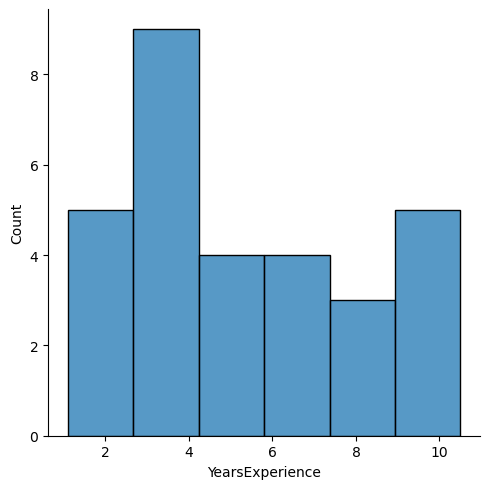

In [6]:
sns.displot(df["YearsExperience"])

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


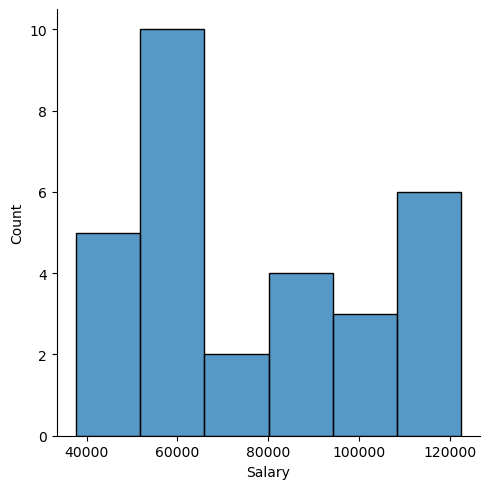

In [7]:
sns.displot(df["Salary"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_12560\1382351491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["YearsExperience"])


<Axes: xlabel='YearsExperience', ylabel='Density'>

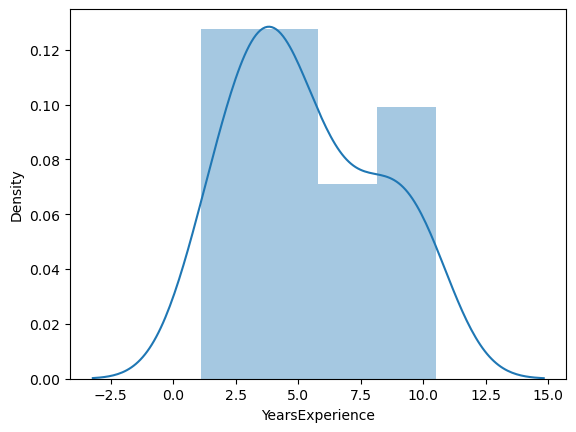

In [8]:
sns.distplot(df["YearsExperience"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_12560\738670369.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

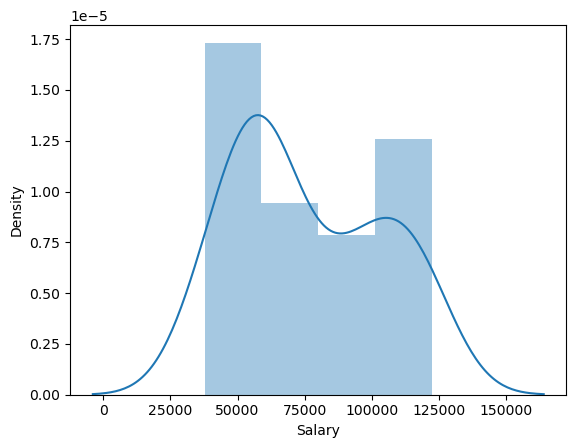

In [9]:
sns.distplot(df["Salary"])

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


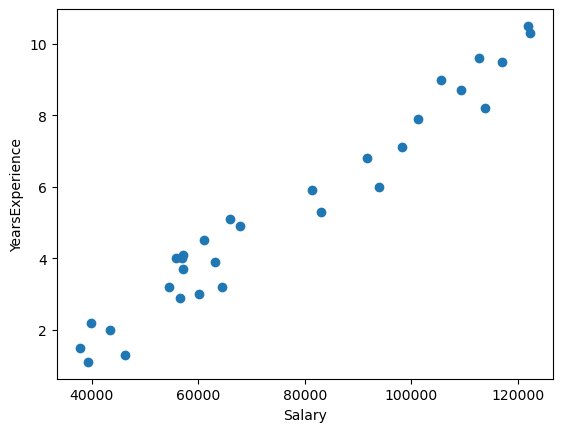

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df["Salary"],df["YearsExperience"])
plt.xlabel("Salary")
plt.ylabel("YearsExperience")
plt.show()

<Axes: xlabel='Salary', ylabel='YearsExperience'>

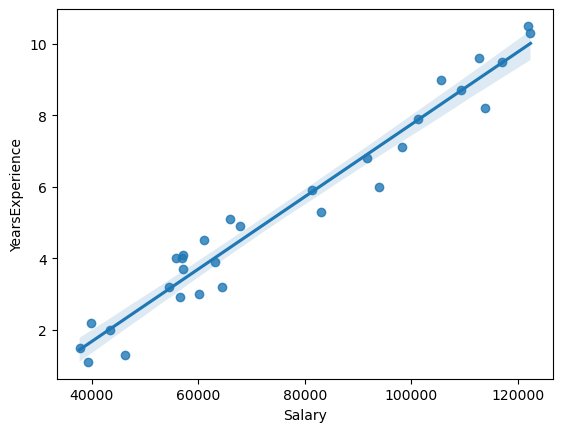

In [12]:
sns.regplot(x=df['Salary'],y=df['YearsExperience'])

In [13]:
yearexp = np.array(df[["YearsExperience"]])
x = yearexp
y = df["Salary"]

In [14]:
from sklearn.linear_model import  LinearRegression
LR = LinearRegression()

In [15]:
# Model fitting
LR.fit(x,y)
# Bo
print("Intercept value: ", LR.intercept_)
#B1
print("Codfficient value: ", LR.coef_)

Intercept value:  25792.20019866871
Codfficient value:  [9449.96232146]


### Model Prediction

In [16]:
# # Manual prediction for say 4 Years Experience
Salary  = (25792.200199) + (9449.962321)*(4)
Salary 

63592.049483

In [17]:
## Predict if  4 Years Experience
Salary = LR.predict([[4]])
print(round(Salary[0],2))

63592.05


In [18]:
## Predict if  5 Years Experience
Salary = LR.predict([[5]])
print(round(Salary[0],2))

73042.01


In [19]:
## Predict if  6 Years Experience
Salary = LR.predict([[6]])
print(round(Salary[0],2))

82491.97


In [20]:
Y_pred = LR.predict(x)
Y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [21]:
# Root Mean Squared error
from sklearn.metrics import mean_squared_error
import numpy as np
RMSE = np.sqrt(mean_squared_error(y, Y_pred))
print("Root Mean Squared error:",RMSE.round(2))

Root Mean Squared error: 5592.04


In [22]:
# Define transformational models  log, square, sqrt
transformations = {'log': np.log(x), 'square': x**2, 'sqrt': np.sqrt(x)}
transformations

{'log': array([[0.09531018],
        [0.26236426],
        [0.40546511],
        [0.69314718],
        [0.78845736],
        [1.06471074],
        [1.09861229],
        [1.16315081],
        [1.16315081],
        [1.30833282],
        [1.36097655],
        [1.38629436],
        [1.38629436],
        [1.41098697],
        [1.5040774 ],
        [1.58923521],
        [1.62924054],
        [1.66770682],
        [1.77495235],
        [1.79175947],
        [1.91692261],
        [1.96009478],
        [2.06686276],
        [2.10413415],
        [2.16332303],
        [2.19722458],
        [2.2512918 ],
        [2.2617631 ],
        [2.3321439 ],
        [2.35137526]]),
 'square': array([[  1.21],
        [  1.69],
        [  2.25],
        [  4.  ],
        [  4.84],
        [  8.41],
        [  9.  ],
        [ 10.24],
        [ 10.24],
        [ 13.69],
        [ 15.21],
        [ 16.  ],
        [ 16.  ],
        [ 16.81],
        [ 20.25],
        [ 24.01],
        [ 26.01],
        [ 28.09

In [23]:
# Build transformation models and calculate RMSE
for transformation_name, x_transformed in transformations.items():
    # Linear regression model
    model_transformed = LinearRegression()
    model_transformed.fit(x_transformed, y)

    # Make predictions
    predictions_transformed = model_transformed.predict(x_transformed)

    # Calculate RMSE 
    rmse_transformed = np.sqrt(mean_squared_error(y, predictions_transformed))

    print(f'RMSE for {transformation_name} transformation: {rmse_transformed}')

RMSE for log transformation: 10302.893706228302
RMSE for square transformation: 7843.471199698867
RMSE for sqrt transformation: 7080.095734983039
